<a href="https://colab.research.google.com/github/sirfara12/Pembelajaran-Mesin-Semester-5/blob/main/JS04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PRAKTIKUM 1

from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.iloc[:, :-1]   # semua kolom kecuali Species
y = df.iloc[:, -1]    # Species

X.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


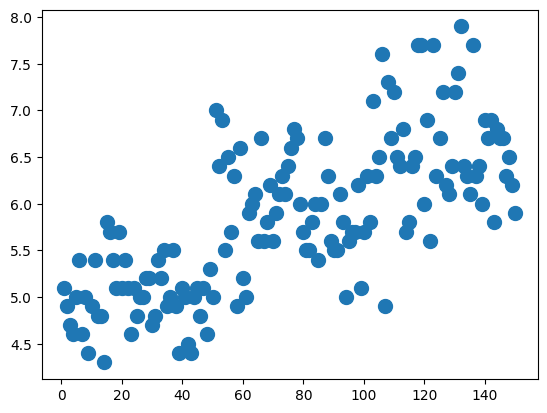

In [ ]:

# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

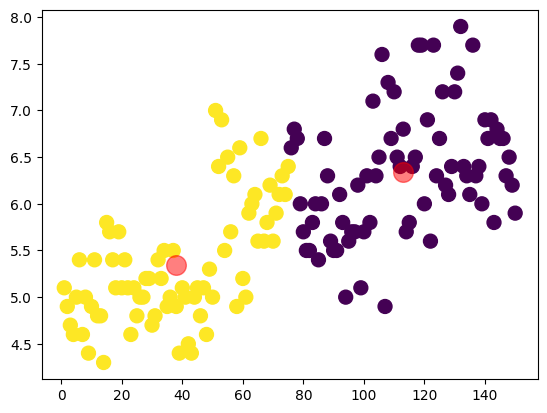

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 70616.29893333331


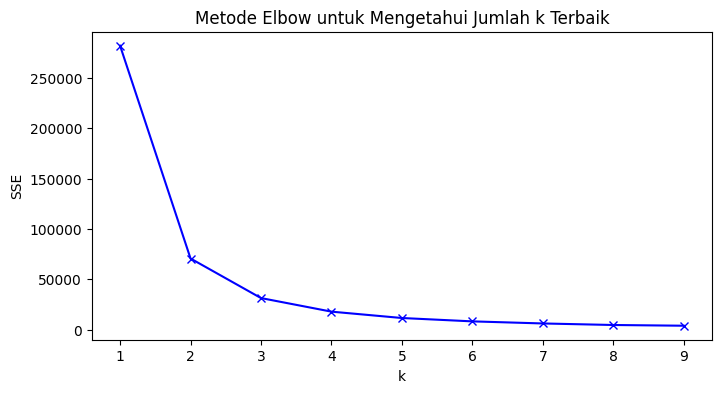

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()


In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=281918.32439999987
k=2; SSE=70649.35473684213
k=3; SSE=31370.01602577032
k=4; SSE=17885.347575543594
k=5; SSE=11563.1317481497
k=6; SSE=8227.297689657156
k=7; SSE=6155.54376729184
k=8; SSE=4625.47426829328
k=9; SSE=3907.784082854196


In [ ]:
# Praktikum 2

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

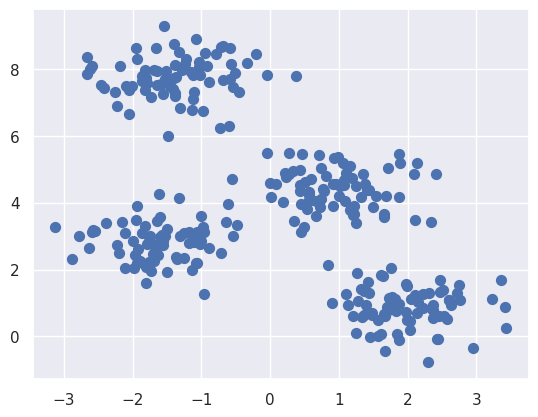

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

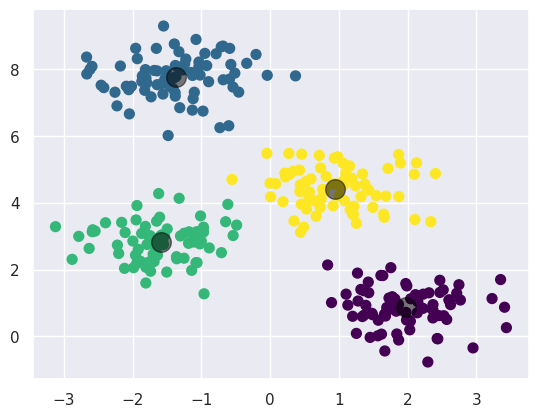

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

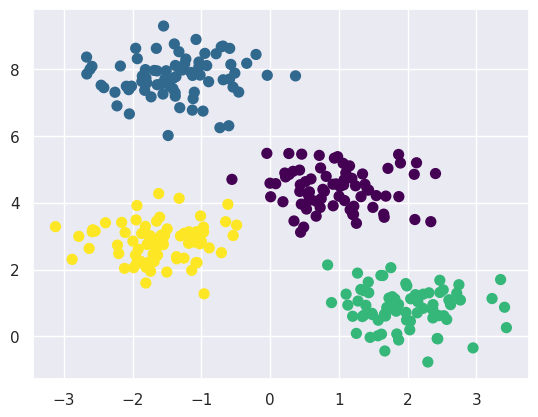

In [ ]:
# Algoritma Expectation-Maximization

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

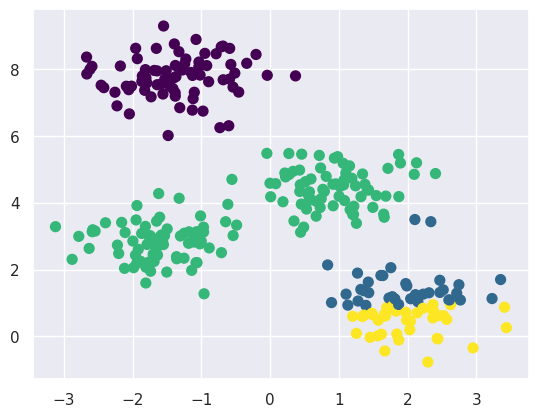

In [ ]:
# Perubahan random
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

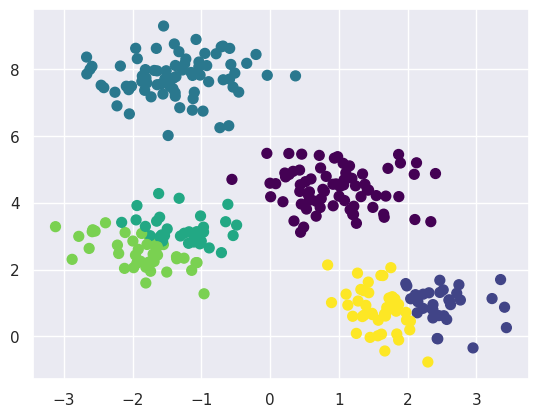

In [ ]:
# Optimalisasi Jumlah Klaster
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
# Batas Klaster yang Tidak Selalu Linier
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

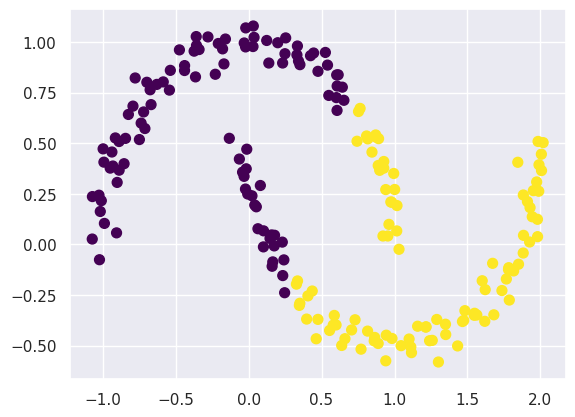

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


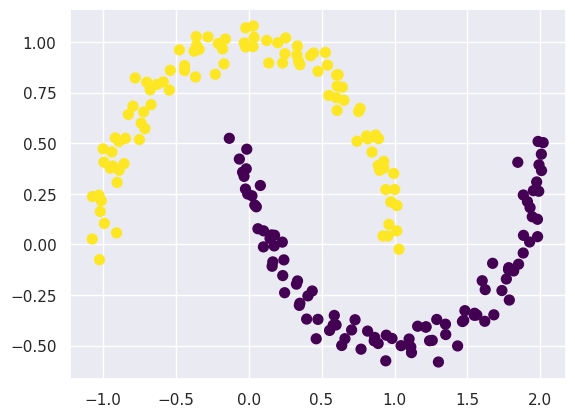

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
# Contoh Kasus 1: Karakter Angka
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)


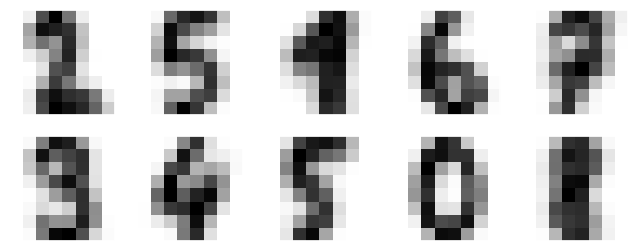

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

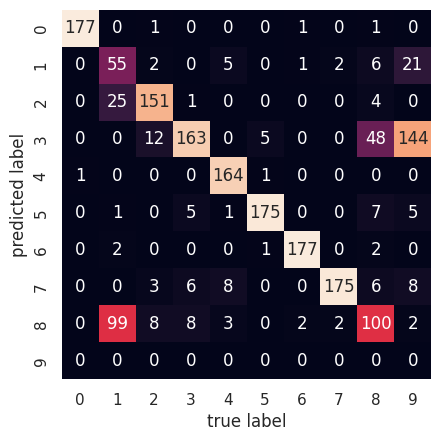

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

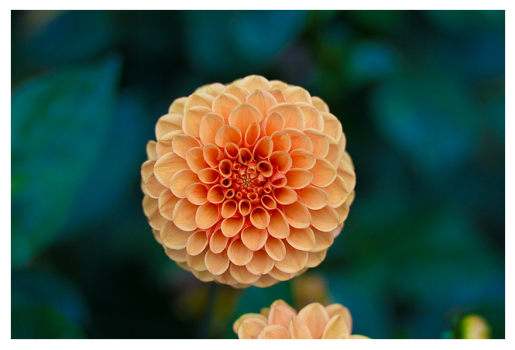

In [ ]:
# Studi Kasus 2: Kompresi Citra
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape


(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

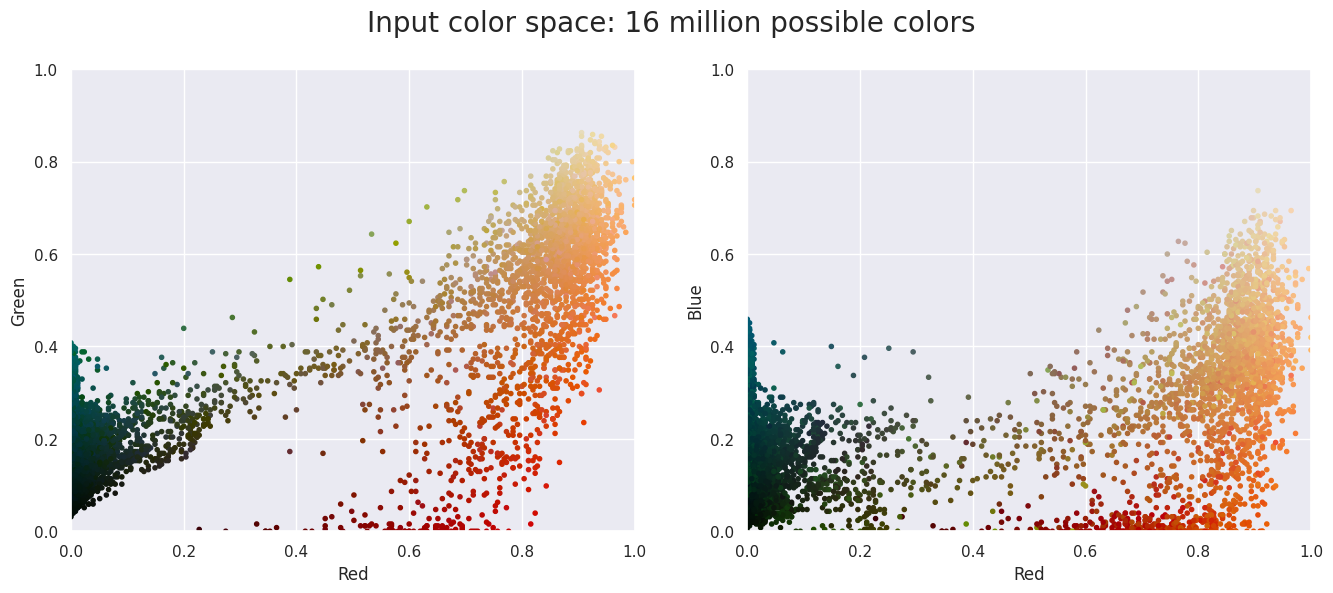

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

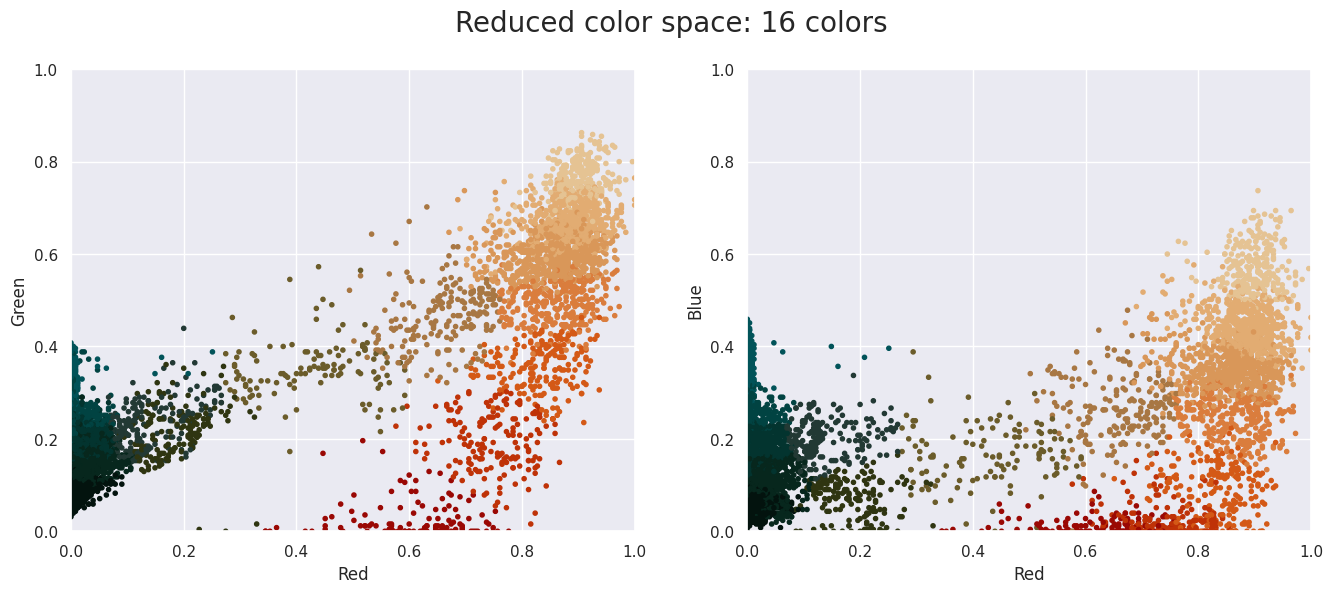

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

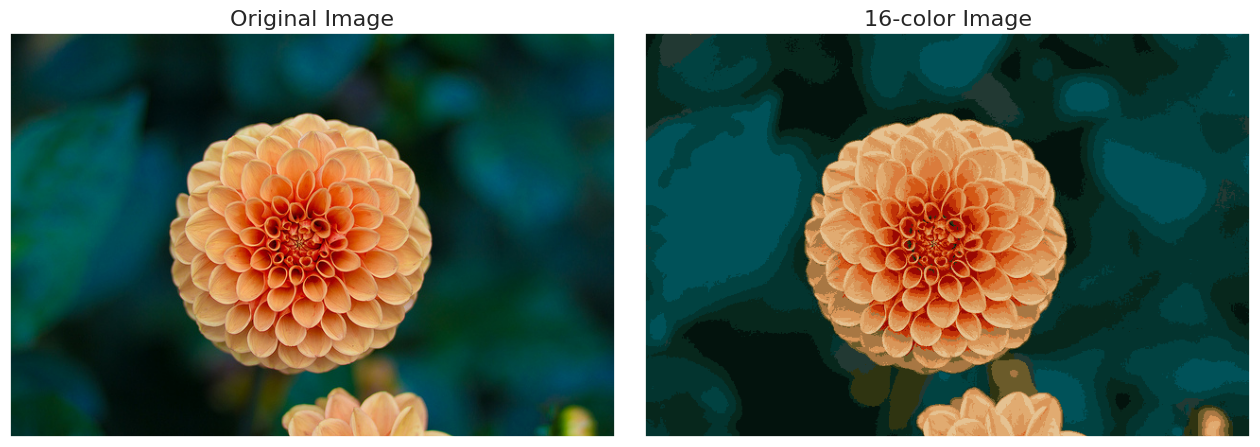

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

In [ ]:
# Praktikum 3
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Tentukan pusat cluster
centers = [[1, 1], [-1, -1], [1, -1]]

# Buat data klasterisasi
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Normalisasi data
X = StandardScaler().fit_transform(X)


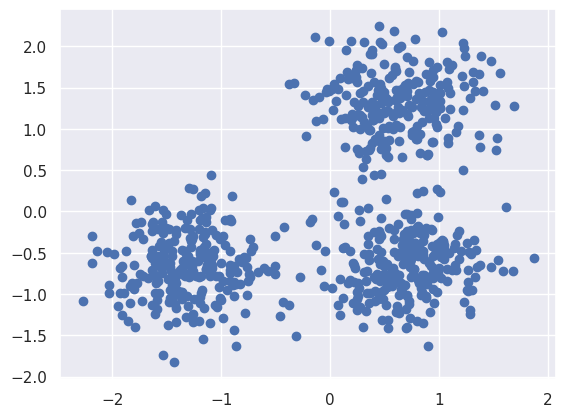

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [ ]:
# Compute DBSCAN

import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Terapkan DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Jumlah klaster
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18


In [ ]:
# Evaluasi Kualitas Klasterisasi
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


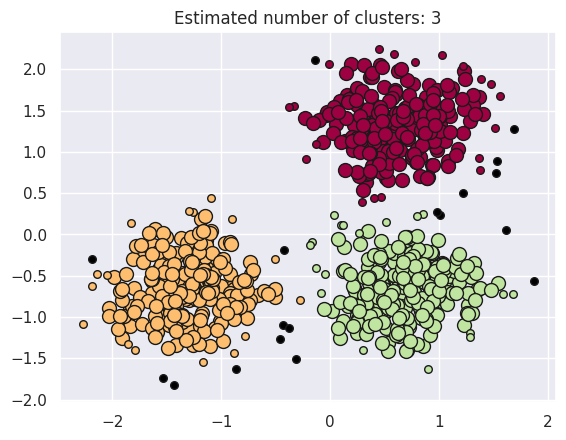

In [ ]:
# Visualisasi Hasil Klasterisasi
import matplotlib.pyplot as plt
import numpy as np

# Mask core sample
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Warna untuk cluster
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = warna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples (titik besar)
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(
        xy[:, 0], xy[:, 1],
        marker='o',
        s=100,
        c=[tuple(col)],
        edgecolors='k'
    )

    # Non-core samples (titik kecil)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(
        xy[:, 0], xy[:, 1],
        marker='o',
        s=30,
        c=[tuple(col)],
        edgecolors='k'
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


In [ ]:
# TUGAS PRAKTIKUM
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# 2. Pilih fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


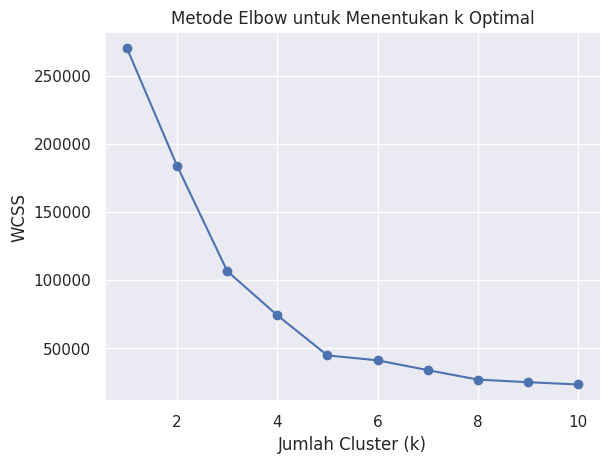

In [ ]:
# Tentukan jumlah cluster (k) terbaik → Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()


In [ ]:
# 4. Buat model K-Means dengan k optimal
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


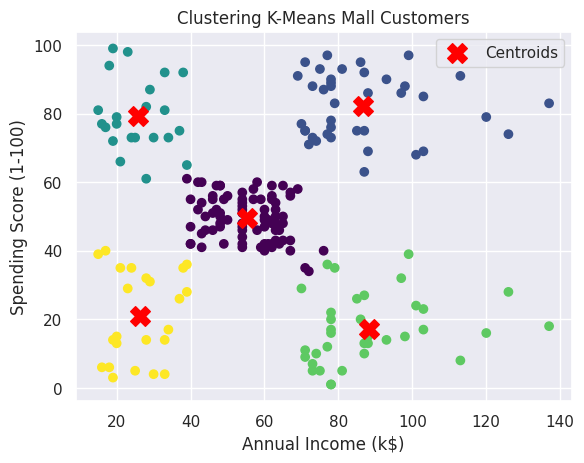

In [ ]:
# 5. Visualisasi hasil clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering K-Means Mall Customers')
plt.legend()
plt.show()


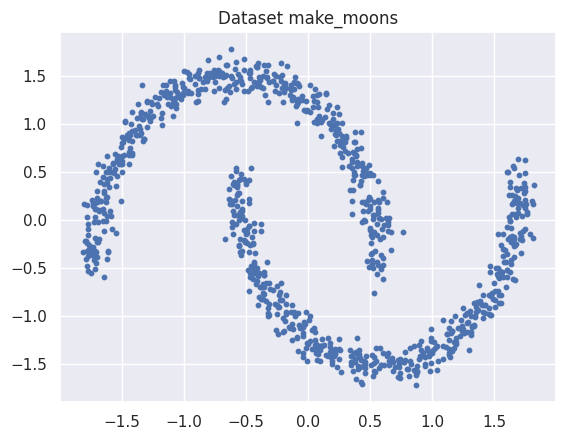

In [ ]:
# Tugas DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Normalisasi
X = StandardScaler().fit_transform(X)

# Visualisasi data awal
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Dataset make_moons")
plt.show()


In [ ]:
# 2. DBSCAN dengan parameter dasar (eps=0.2, min_samples=5)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Hitung jumlah klaster & noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Jumlah klaster: ", n_clusters_)
print("Jumlah noise: ", n_noise_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


Jumlah klaster:  2
Jumlah noise:  0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


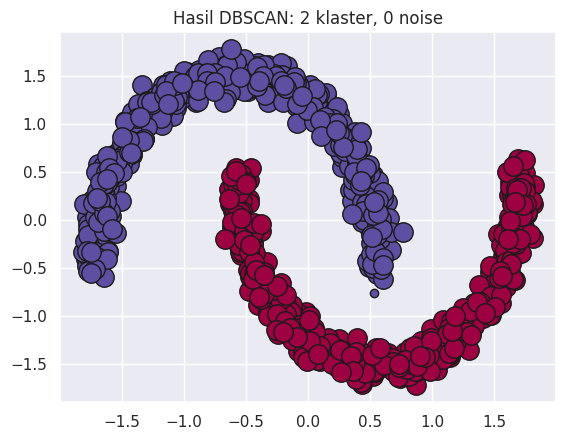

In [ ]:
# 3. Visualisasi hasil DBSCAN
# Mask core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)

# Warna tiap klaster
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Hasil DBSCAN: {n_clusters_} klaster, {n_noise_} noise")
plt.show()


In [ ]:
# 4. Eksperimen dengan variasi eps dan min_samples
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        print(f"\n=== eps={eps}, min_samples={ms} ===")
        print("Jumlah klaster:", n_clusters_)
        print("Jumlah noise:", n_noise_)
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
        print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
        if n_clusters_ > 1:  # Silhouette butuh >= 2 klaster
            print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
        else:
            print("Silhouette Coefficient: Tidak terdefinisi (hanya 1 klaster)")



=== eps=0.05, min_samples=3 ===
Jumlah klaster: 67
Jumlah noise: 197
Homogeneity: 0.804
Completeness: 0.155
V-measure: 0.260
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.246
Silhouette Coefficient: 0.078

=== eps=0.05, min_samples=5 ===
Jumlah klaster: 51
Jumlah noise: 444
Homogeneity: 0.556
Completeness: 0.137
V-measure: 0.220
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.208
Silhouette Coefficient: -0.102

=== eps=0.05, min_samples=10 ===
Jumlah klaster: 0
Jumlah noise: 1000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: Tidak terdefinisi (hanya 1 klaster)

=== eps=0.05, min_samples=20 ===
Jumlah klaster: 0
Jumlah noise: 1000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: Tidak terdefinisi (hanya 1 klaster)

=== eps=0.1, min_samples=3 ===
Jumlah klaster: 3
Jumlah noise: 1

eps kecil → lebih ketat, biasanya banyak noise & klaster bisa pecah jadi kecil-kecil.

eps besar → lebih longgar, noise berkurang, tapi bisa jadi semua titik dianggap 1 klaster.

min_samples kecil → lebih mudah membentuk klaster (bahkan dari titik sedikit).

min_samples besar → makin sulit membentuk klaster, noise lebih banya

In [ ]:
# DBSCAN Eksperimen make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X)

# Daftar parameter
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

#
results = []

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_

        # Jumlah cluster (abaikan noise = -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Evaluasi (cluster >= 2 valid)
        if n_clusters > 1:
            hom = metrics.homogeneity_score(labels_true, labels)
            com = metrics.completeness_score(labels_true, labels)
            v_measure = metrics.v_measure_score(labels_true, labels)
            ari = metrics.adjusted_rand_score(labels_true, labels)
            ami = metrics.adjusted_mutual_info_score(labels_true, labels)
            sil = metrics.silhouette_score(X, labels)
        else:
            hom = com = v_measure = ari = ami = sil = np.nan

        results.append([eps, ms, n_clusters, n_noise, hom, com, v_measure, ari, ami, sil])

df_results = pd.DataFrame(results, columns=[
    "eps", "min_samples", "Clusters", "Noise",
    "Homogeneity", "Completeness", "V-measure",
    "ARI", "AMI", "Silhouette"
])

print(df_results)


     eps  min_samples  Clusters  Noise  Homogeneity  Completeness  V-measure  \
0   0.05            3        67    197     0.803825      0.154915   0.259767   
1   0.05           10         0   1000          NaN           NaN        NaN   
2   0.05           20         0   1000          NaN           NaN        NaN   
3   0.10            3         3     18     0.983471      0.708395   0.823571   
4   0.10           10         9     63     0.938949      0.358282   0.518656   
5   0.10           20         6    844     0.157108      0.153385   0.155224   
6   0.30            3         2      0     1.000000      1.000000   1.000000   
7   0.30           10         2      0     1.000000      1.000000   1.000000   
8   0.30           20         2      0     1.000000      1.000000   1.000000   
9   0.50            3         1      0          NaN           NaN        NaN   
10  0.50           10         1      0          NaN           NaN        NaN   
11  0.50           20         2      0  

Jurnal “MDST-DBSCAN: A Density-Based Clustering Method for Multidimensional Spatiotemporal Data”

Jurnal: ISPRS International Journal of Geo-Information (MDPI), 2021

Topik: Data Mining, Spatiotemporal Clustering, DBSCAN

Data spasio-temporal semakin banyak dihasilkan (contoh: data transaksi, GPS, layanan berbasis lokasi). Data ini kompleks dan berukuran besar, sehingga butuh metode klasterisasi yang efisien.
DBSCAN dan turunannya (ST-DBSCAN, 4D+SNN) sering dipakai, tapi masih terbatas jika datanya punya banyak variabel tambahan (selain koordinat + waktu).

Mengusulkan metode baru bernama MDST-DBSCAN (Multidimensional Spatiotemporal DBSCAN), yang bisa:
- Menangani banyak variabel sekaligus (multidimensional).
- Efisien menghitung untuk data berukuran besar.
- Hasilnya tetap bisa dijelaskan (explainable).

Metode (MDST-DBSCAN)


*   Perpanjangan dari ST-DBSCAN.
Jika dataset punya n variabel + koordinat (x,y) + waktu, maka metode ini pakai (n+2) nilai epsilon (Eps).

*   Sebuah titik dianggap tetangga jika memenuhi semua ambang batas (strict mode).
*  Untuk efisiensi, tidak semua jarak dihitung sekaligus (menghindari matrix penuh), tapi dihitung point-by-point, yang lebih scalable untuk data besar.
*   Ditulis dalam bahasa R (kode ada di GitHub).


Ekdperimen menggunakan Data transaksi rumah tapak (detached houses), maka saya menggunakan yang paling relevan adalah dg jurnal yaitu seoul - SeoulRealEstate.csv.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import files

# Pilih file .plt
uploaded = files.upload()


Saving seoul - SeoulRealEstate.csv to seoul - SeoulRealEstate.csv


In [ ]:
# 2. Load dataset
df = pd.read_csv("seoul - SeoulRealEstate.csv")
print(df.head())
print(df.columns)

      id        lat         lng  households  buildDate  score   m2   p  \
0   2766  37.681604  127.056592         492     200006    4.3  139  42   
1   5860  37.679290  127.057021         468     200105    4.1  105  32   
2  15564  37.676882  127.058075          57     200502    4.8   86  26   
3   3700  37.675277  127.060001         216     199509    4.8  102  31   
4   6204  37.676381  127.058361         165     200306    4.8   91  28   

   min_sales  max_sales  avg_sales  
0    60100.0    62000.0    61000.0  
1    48600.0    52200.0    51000.0  
2    36000.0    46000.0    40500.0  
3    34000.0    34800.0    34500.0  
4    27900.0    50300.0    40000.0  
Index(['id', 'lat', 'lng', 'households', 'buildDate', 'score', 'm2', 'p',
       'min_sales', 'max_sales', 'avg_sales'],
      dtype='object')


In [ ]:
df['buildDate'] = pd.to_datetime(df['buildDate'], errors='coerce')
df['year'] = df['buildDate'].dt.year

In [ ]:
#memilih kolom clustering
X = df[['lat','lng','year','avg_sales']].dropna()
print("Jumlah data yang dipakai untuk clustering:", X.shape)

Jumlah data yang dipakai untuk clustering: (3931, 4)


In [ ]:
# Normalisasi (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Contoh data setelah scaling:\n", X_scaled[:5])


Contoh data setelah scaling:
 [[ 0.58254575 -0.00608578  0.          0.51564669]
 [ 0.57643894 -0.00495042  0.          0.15842831]
 [ 0.57008403 -0.00215939  0.         -0.21665099]
 [ 0.56584894  0.00293729  0.         -0.43098202]
 [ 0.5687616  -0.00140433  0.         -0.23451191]]


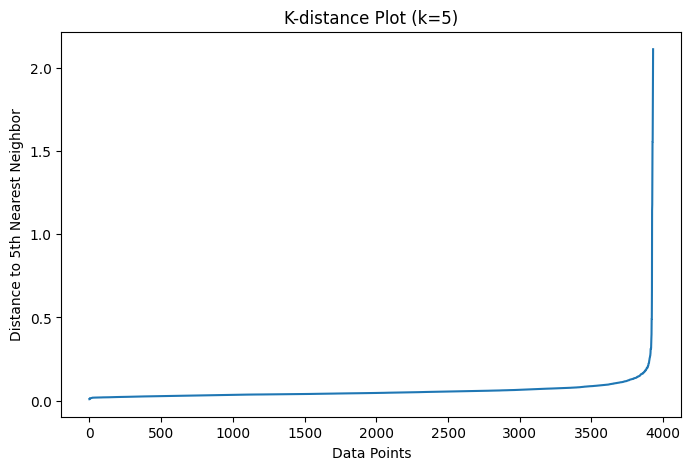

In [ ]:
# Cari nilai eps dengan K-Distance Plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4])
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("K-distance Plot (k=5)")
plt.xlabel("Data Points")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.show()


In [ ]:
#  Jalankan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

df.loc[X.index, 'cluster'] = labels
print(df['cluster'].value_counts())


cluster
 0.0    3713
 1.0     210
-1.0       8
Name: count, dtype: int64


In [ ]:
# --- Analisis per Cluster ---
cluster_stats = df.groupby('cluster').agg({
    'avg_sales': ['mean','min','max'],
    'year': ['min','max'],
    'lat': 'mean',
    'lng': 'mean',
    'id': 'count'
}).rename(columns={'id':'count'})

print("\n📊 Statistik Per Cluster:")
print(cluster_stats)

cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]
cluster_stats = cluster_stats.reset_index()
print("\n📊 Statistik Ringkas Per Cluster:")
print(cluster_stats)



📊 Statistik Per Cluster:
             avg_sales                      year              lat         lng  \
                  mean       min       max   min   max       mean        mean   
cluster                                                                         
-1.0     299625.000000  251000.0  362000.0  1970  1970  37.536669  127.025156   
 0.0      47273.821708    4900.0  225000.0  1970  1970  37.550128  126.971363   
 1.0      24390.952381    2700.0   73500.0  1970  1970  35.879849  128.607766   

        count  
        count  
cluster        
-1.0        8  
 0.0     3713  
 1.0      210  

📊 Statistik Ringkas Per Cluster:
   cluster  avg_sales_mean  avg_sales_min  avg_sales_max  year_min  year_max  \
0     -1.0   299625.000000       251000.0       362000.0      1970      1970   
1      0.0    47273.821708         4900.0       225000.0      1970      1970   
2      1.0    24390.952381         2700.0        73500.0      1970      1970   

    lat_mean    lng_mean  count_coun

In [ ]:
print("Jumlah cluster terbentuk:", len(set(labels)) - (1 if -1 in labels else 0))
print("Jumlah noise:", list(labels).count(-1))
print(df['cluster'].value_counts())

Jumlah cluster terbentuk: 2
Jumlah noise: 8
cluster
 0.0    3713
 1.0     210
-1.0       8
Name: count, dtype: int64


In [ ]:
#  Evaluasi kualitas cluster (hanya cluster > 1)
if len(set(labels)) > 1:
    sil_score = silhouette_score(X_scaled, labels)
    print("Silhouette Score:", sil_score)

Silhouette Score: 0.8388418850606301


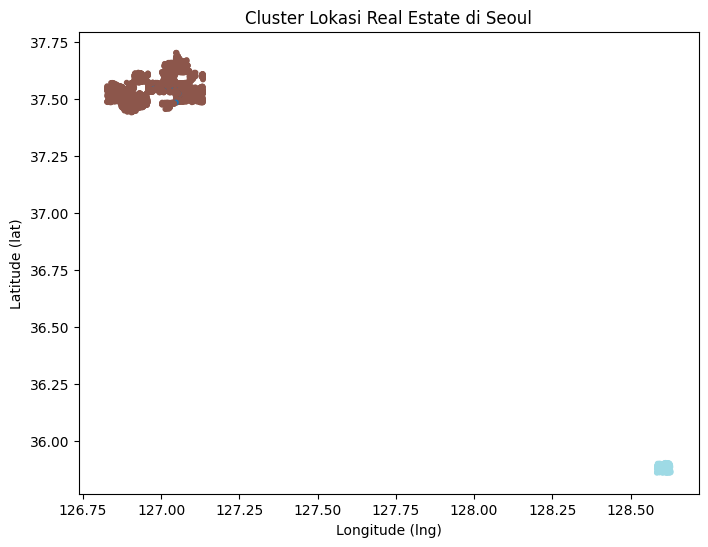

In [ ]:
# Visualisasi hasil cluster
plt.figure(figsize=(8,6))
plt.scatter(df['lng'], df['lat'], c=df['cluster'], cmap='tab20', s=10)
plt.title("Cluster Lokasi Real Estate di Seoul")
plt.xlabel("Longitude (lng)")
plt.ylabel("Latitude (lat)")
plt.show()

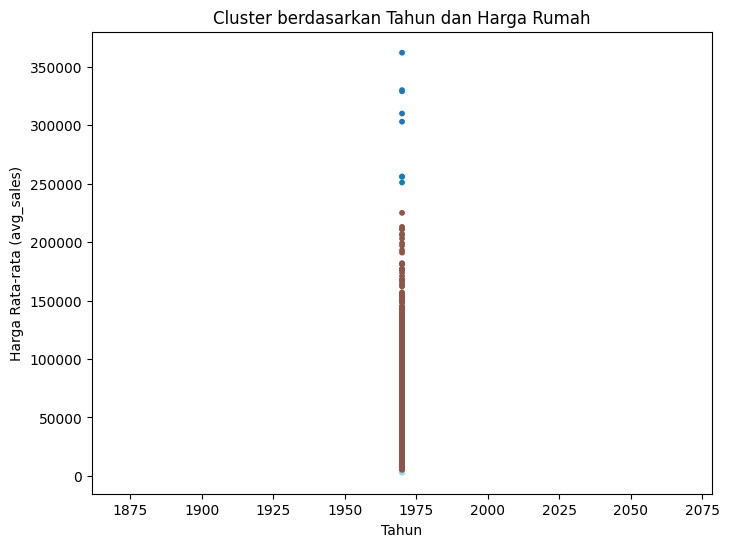

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['year'], df['avg_sales'], c=df['cluster'], cmap='tab20', s=10)
plt.title("Cluster berdasarkan Tahun dan Harga Rumah")
plt.xlabel("Tahun")
plt.ylabel("Harga Rata-rata (avg_sales)")
plt.show()

In [ ]:
print(df.groupby('cluster')['avg_sales'].mean())


cluster
-1.0    299625.000000
 0.0     47273.821708
 1.0     24390.952381
Name: avg_sales, dtype: float64


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.8388418850606301
